# 분석개요

1. 필요한 모듈 설치
2. dataset 불러오기
3. dataset 요약
4. dataset 시각화
5. 알고리즘 평가
6. 예측값 생성하기

# 1. 필요한 라이브러리 설치하기

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 2. python과 라이브러리 버전 확인

In [2]:
import sys
print('Python: {}'.format(sys.version))         # python 버전확인
import scipy
print('scipy: {}'.format(scipy.__version__))    # scipy 버전확인
import numpy
print('numpy: {}'.format(numpy.__version__))    # numpy 버전확인
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))  # matplotlib 버전확인
import pandas
print('pandas: {}'.format(pandas.__version__))          # pandas 버전확인
import sklearn
print('sklearn: {}'.format(sklearn.__version__))        # sklearn 버전확인

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3


 # ※ dataset 구성 (5개 열과 150개 행) 
  1. **petal length(꽃잎길이)**
  2. **petal width(꽃잎폭)**
  3. **sepal length(꽃받침길이)**
  4. **sepal width(꽃받침폭)**
  5. **species(꽃의 종): Setosa, Versicolor, Verginica**

|     Setosa   | Versicolor  |  Verginica |
|--------------|-------------|------------|
|<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg' width='113'/>|<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg' width='200'/>|<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg' width='190'/>

![iris](https://user-images.githubusercontent.com/50024239/71894960-188bf380-3193-11ea-83c6-772f8339b373.png)

# 3. dataset 불러오기

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
url = 'C:\\Users\\Administrator\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = pd.read_csv(url, names = names)

# 4. dataset 요약

In [5]:
dataset.head()

sepal-length  sepal-width petal-length petal-width      class
0         150.0          4.0       setosa  versicolor  virginica
1           5.1          3.5          1.4         0.2          0
2           4.9          3.0          1.4         0.2          0
3           4.7          3.2          1.3         0.2          0
4           4.6          3.1          1.5         0.2          0

In [6]:
dataset[0:1]

sepal-length  sepal-width petal-length petal-width      class
0         150.0          4.0       setosa  versicolor  virginica

In [7]:
data = dataset[1:].copy().reset_index(drop=True)
data.head()

sepal-length  sepal-width petal-length petal-width class
0           5.1          3.5          1.4         0.2     0
1           4.9          3.0          1.4         0.2     0
2           4.7          3.2          1.3         0.2     0
3           4.6          3.1          1.5         0.2     0
4           5.0          3.6          1.4         0.2     0

In [8]:
data['class'].unique()

array(['0', '1', '2'], dtype=object)

## 4.1 데이터의 크기 확인

In [9]:
data.shape

(150, 5)

In [10]:
data.head()

sepal-length  sepal-width petal-length petal-width class
0           5.1          3.5          1.4         0.2     0
1           4.9          3.0          1.4         0.2     0
2           4.7          3.2          1.3         0.2     0
3           4.6          3.1          1.5         0.2     0
4           5.0          3.6          1.4         0.2     0

In [11]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

## 4.2 통계치 확인

In [12]:
data.describe()

sepal-length  sepal-width
count    150.000000   150.000000
mean       5.843333     3.057333
std        0.828066     0.435866
min        4.300000     2.000000
25%        5.100000     2.800000
50%        5.800000     3.000000
75%        6.400000     3.300000
max        7.900000     4.400000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null object
petal-width     150 non-null object
class           150 non-null object
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [14]:
data['petal-length'] = data['petal-length'].astype('float')
data['petal-width'] = data['petal-width'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [16]:
data.head()

sepal-length  sepal-width  petal-length  petal-width class
0           5.1          3.5           1.4          0.2     0
1           4.9          3.0           1.4          0.2     0
2           4.7          3.2           1.3          0.2     0
3           4.6          3.1           1.5          0.2     0
4           5.0          3.6           1.4          0.2     0

In [17]:
data.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## 4.3 class(꽃의 종)의 분포

In [18]:
dataset.groupby('class').size()

class
0            50
1            50
2            50
virginica     1
dtype: int64

## 4.4 여기까지 코드 한 번에 정리

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
url = 'C:\\Users\\Administrator\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = pd.read_csv(url, names = names)
data = dataset[1:].copy().reset_index(drop=True)
print(data.shape)
data['petal-length'] = data['petal-length'].astype('float')
data['petal-width'] = data['petal-width'].astype('float')
print(data.head())
print(data.describe())
print(dataset.groupby('class').size())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width class
0           5.1          3.5           1.4          0.2     0
1           4.9          3.0           1.4          0.2     0
2           4.7          3.2           1.3          0.2     0
3           4.6          3.1           1.5          0.2     0
4           5.0          3.6           1.4          0.2     0
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
0            50
1            50
2            50
virginica     1
dtype: in

--------

# 5. dataset 시각화

In [20]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))
sns.boxplot(data=data[data.columns[0]],ax=ax1)
ax1.set(xlabel=data.columns[0])
sns.boxplot(data=data[data.columns[1]],ax=ax2)
ax2.set(xlabel=data.columns[1])
sns.boxplot(data=data[data.columns[2]],ax=ax3)
ax3.set(xlabel=data.columns[2])
sns.boxplot(data=data[data.columns[3]],ax=ax4)
ax4.set(xlabel=data.columns[3])

[Text(0.5, 0, 'petal-width')]

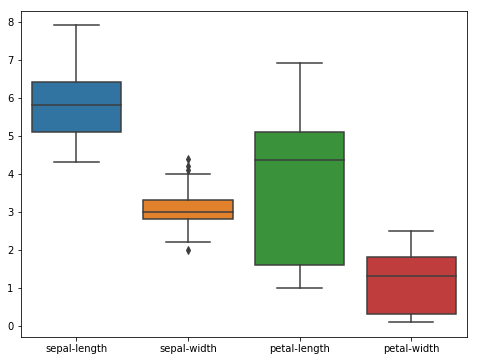

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data[data.columns[:4]])
plt.show()

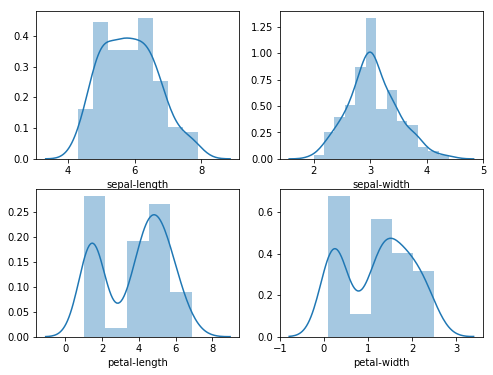

In [22]:
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(8,6))

sns.distplot(data[data.columns[0]],ax=ax0)
sns.distplot(data[data.columns[1]],ax=ax1)
sns.distplot(data[data.columns[2]],ax=ax2)
sns.distplot(data[data.columns[3]],ax=ax3)

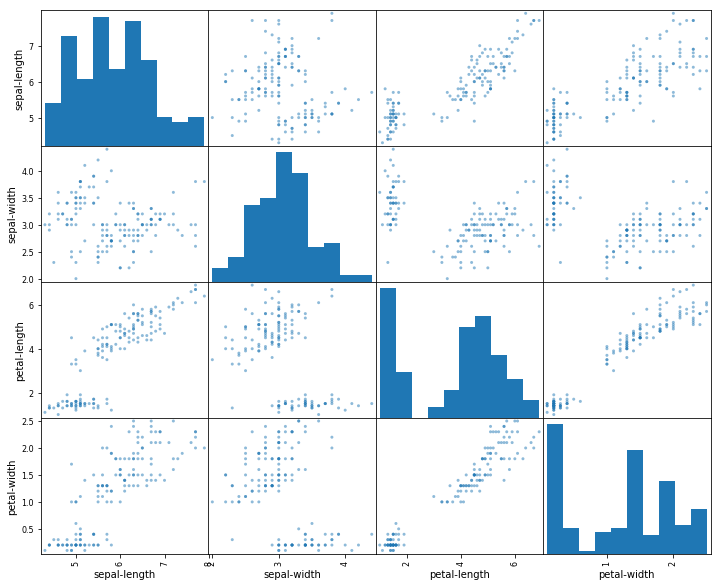

In [23]:
scatter_matrix(data,figsize=(12,10))
plt.show()

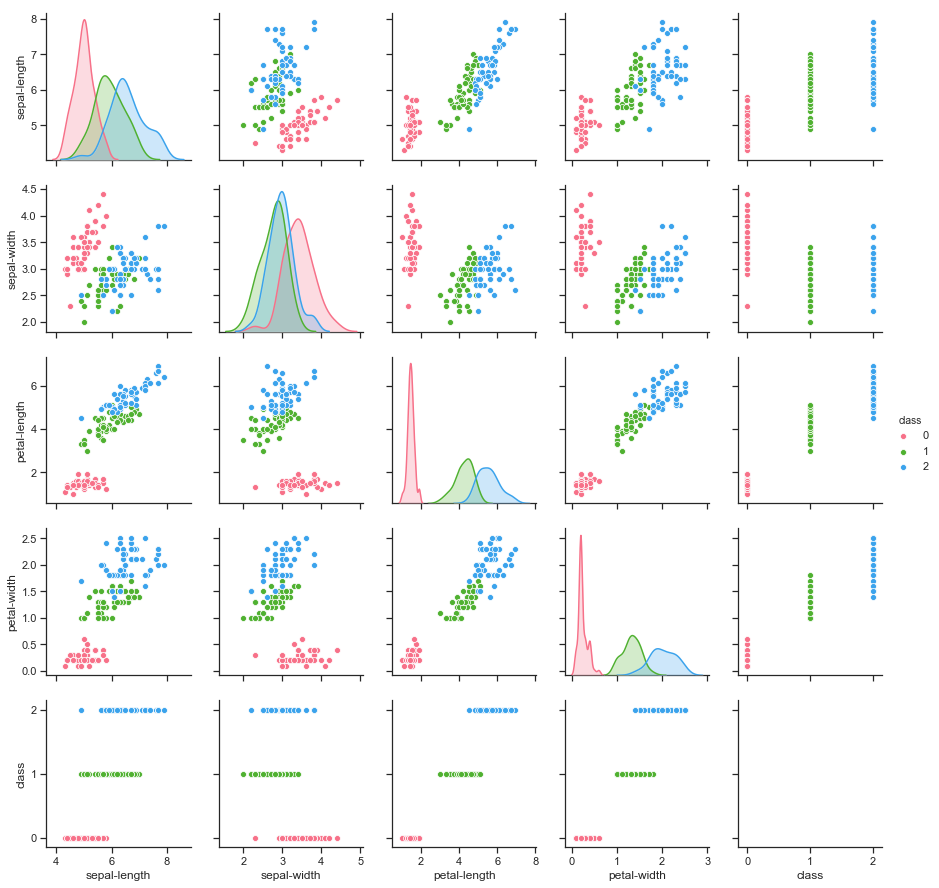

In [34]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, hue='class', palette='husl')

# 6. 모델링 및 모델평가

#### [모델링 순서]

  1. 훈련용 데이터와 평가용 데이터로 나누기
  2. k-fold 교차검증을 위한 테스트용 데이터 셋업
  3. 꽃의 각각의 측정치로부터 꽃의 종을 알아 맞추는 여러 모델들을 만들어 보기
  4. 가장 좋은 모델을 선택하기

## 6.1 데이터 나누기

In [24]:
array = data.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

## 6.2 모델링

In [25]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [26]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 (

### 6.3.1 모델 정확도 평가

In [27]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)   # 10번 테스트검증
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s - mean: %f (sd:%f)' % (name, cv_results.mean(), cv_results.std()))

LR - mean: 0.955909 (sd:0.044337)
LDA - mean: 0.975641 (sd:0.037246)
KNN - mean: 0.950524 (sd:0.040563)
CART - mean: 0.958858 (sd:0.053754)
NB - mean: 0.951166 (sd:0.052812)
SVM - mean: 0.983333 (sd:0.033333)


▶ 가장 높은 정확도를 가진 모델은 SVM을 사용한 모델이다. (98.3% 정확도)

In [28]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']

In [29]:
results

[array([1.        , 1.        , 1.        , 1.        , 0.91666667,
        0.91666667, 0.91666667, 1.        , 0.90909091, 0.9       ]),
 array([1.        , 0.92307692, 1.        , 1.        , 0.91666667,
        0.91666667, 1.        , 1.        , 1.        , 1.        ]),
 array([0.92307692, 1.        , 1.        , 0.92307692, 0.91666667,
        0.91666667, 0.91666667, 1.        , 0.90909091, 1.        ]),
 array([1.        , 1.        , 1.        , 0.84615385, 0.91666667,
        0.91666667, 1.        , 1.        , 0.90909091, 1.        ]),
 array([1.        , 0.84615385, 1.        , 0.92307692, 0.91666667,
        0.91666667, 1.        , 1.        , 0.90909091, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 0.91666667,
        0.91666667, 1.        , 1.        , 1.        , 1.        ])]

In [30]:
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names)
plt.show()

# 7. 최적모델(SVM사용)로 예측(꽃의 종)값 생성

In [31]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# 8. 예측값 평가

In [32]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

